In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
dataset=pd.read_csv('https://raw.githubusercontent.com/DaRk-plays/blahblah/main/car%20performance.csv')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [6]:
dataset['horsepower']=dataset['horsepower'].replace('?',np.nan)

In [7]:
dataset['horsepower'].isnull().sum()

0

In [8]:
dataset['horsepower']=dataset['horsepower'].astype('float64')
dataset['horsepower'].fillna((dataset['horsepower'].mean()),inplace=True)
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [9]:

dataset.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [10]:
dataset.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [11]:
dataset=dataset.drop('car name',axis=1) #dropping the unwanted column.
corr_table=dataset.corr()#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.777501,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842437,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897082,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.777501,0.842437,0.897082,1.000000,0.863990,-0.686436,-0.417081,-0.452386
weight,-0.831741,0.896017,0.932824,0.863990,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686436,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.417081,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452386,-0.581024,0.205873,0.180662,1.000000


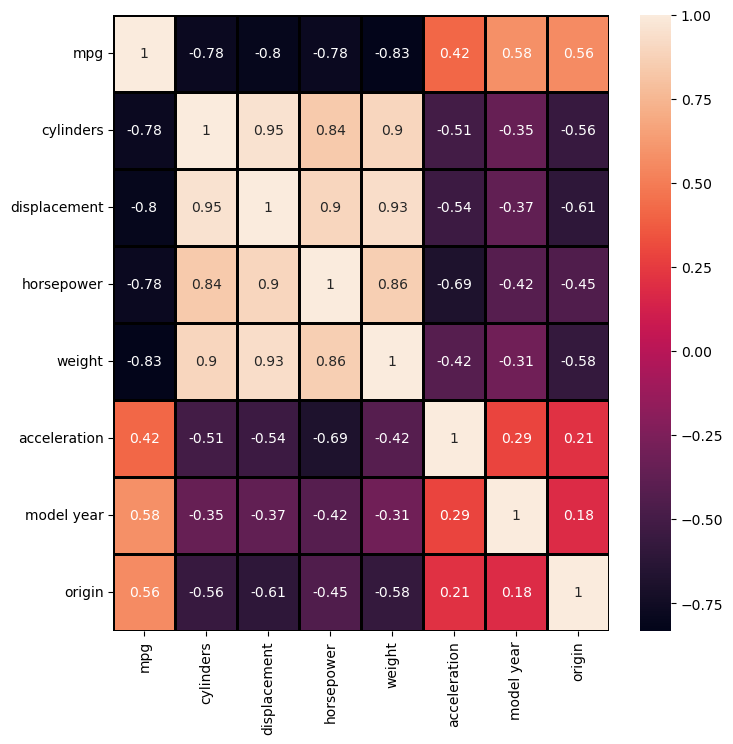

In [12]:
sns.heatmap(dataset.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

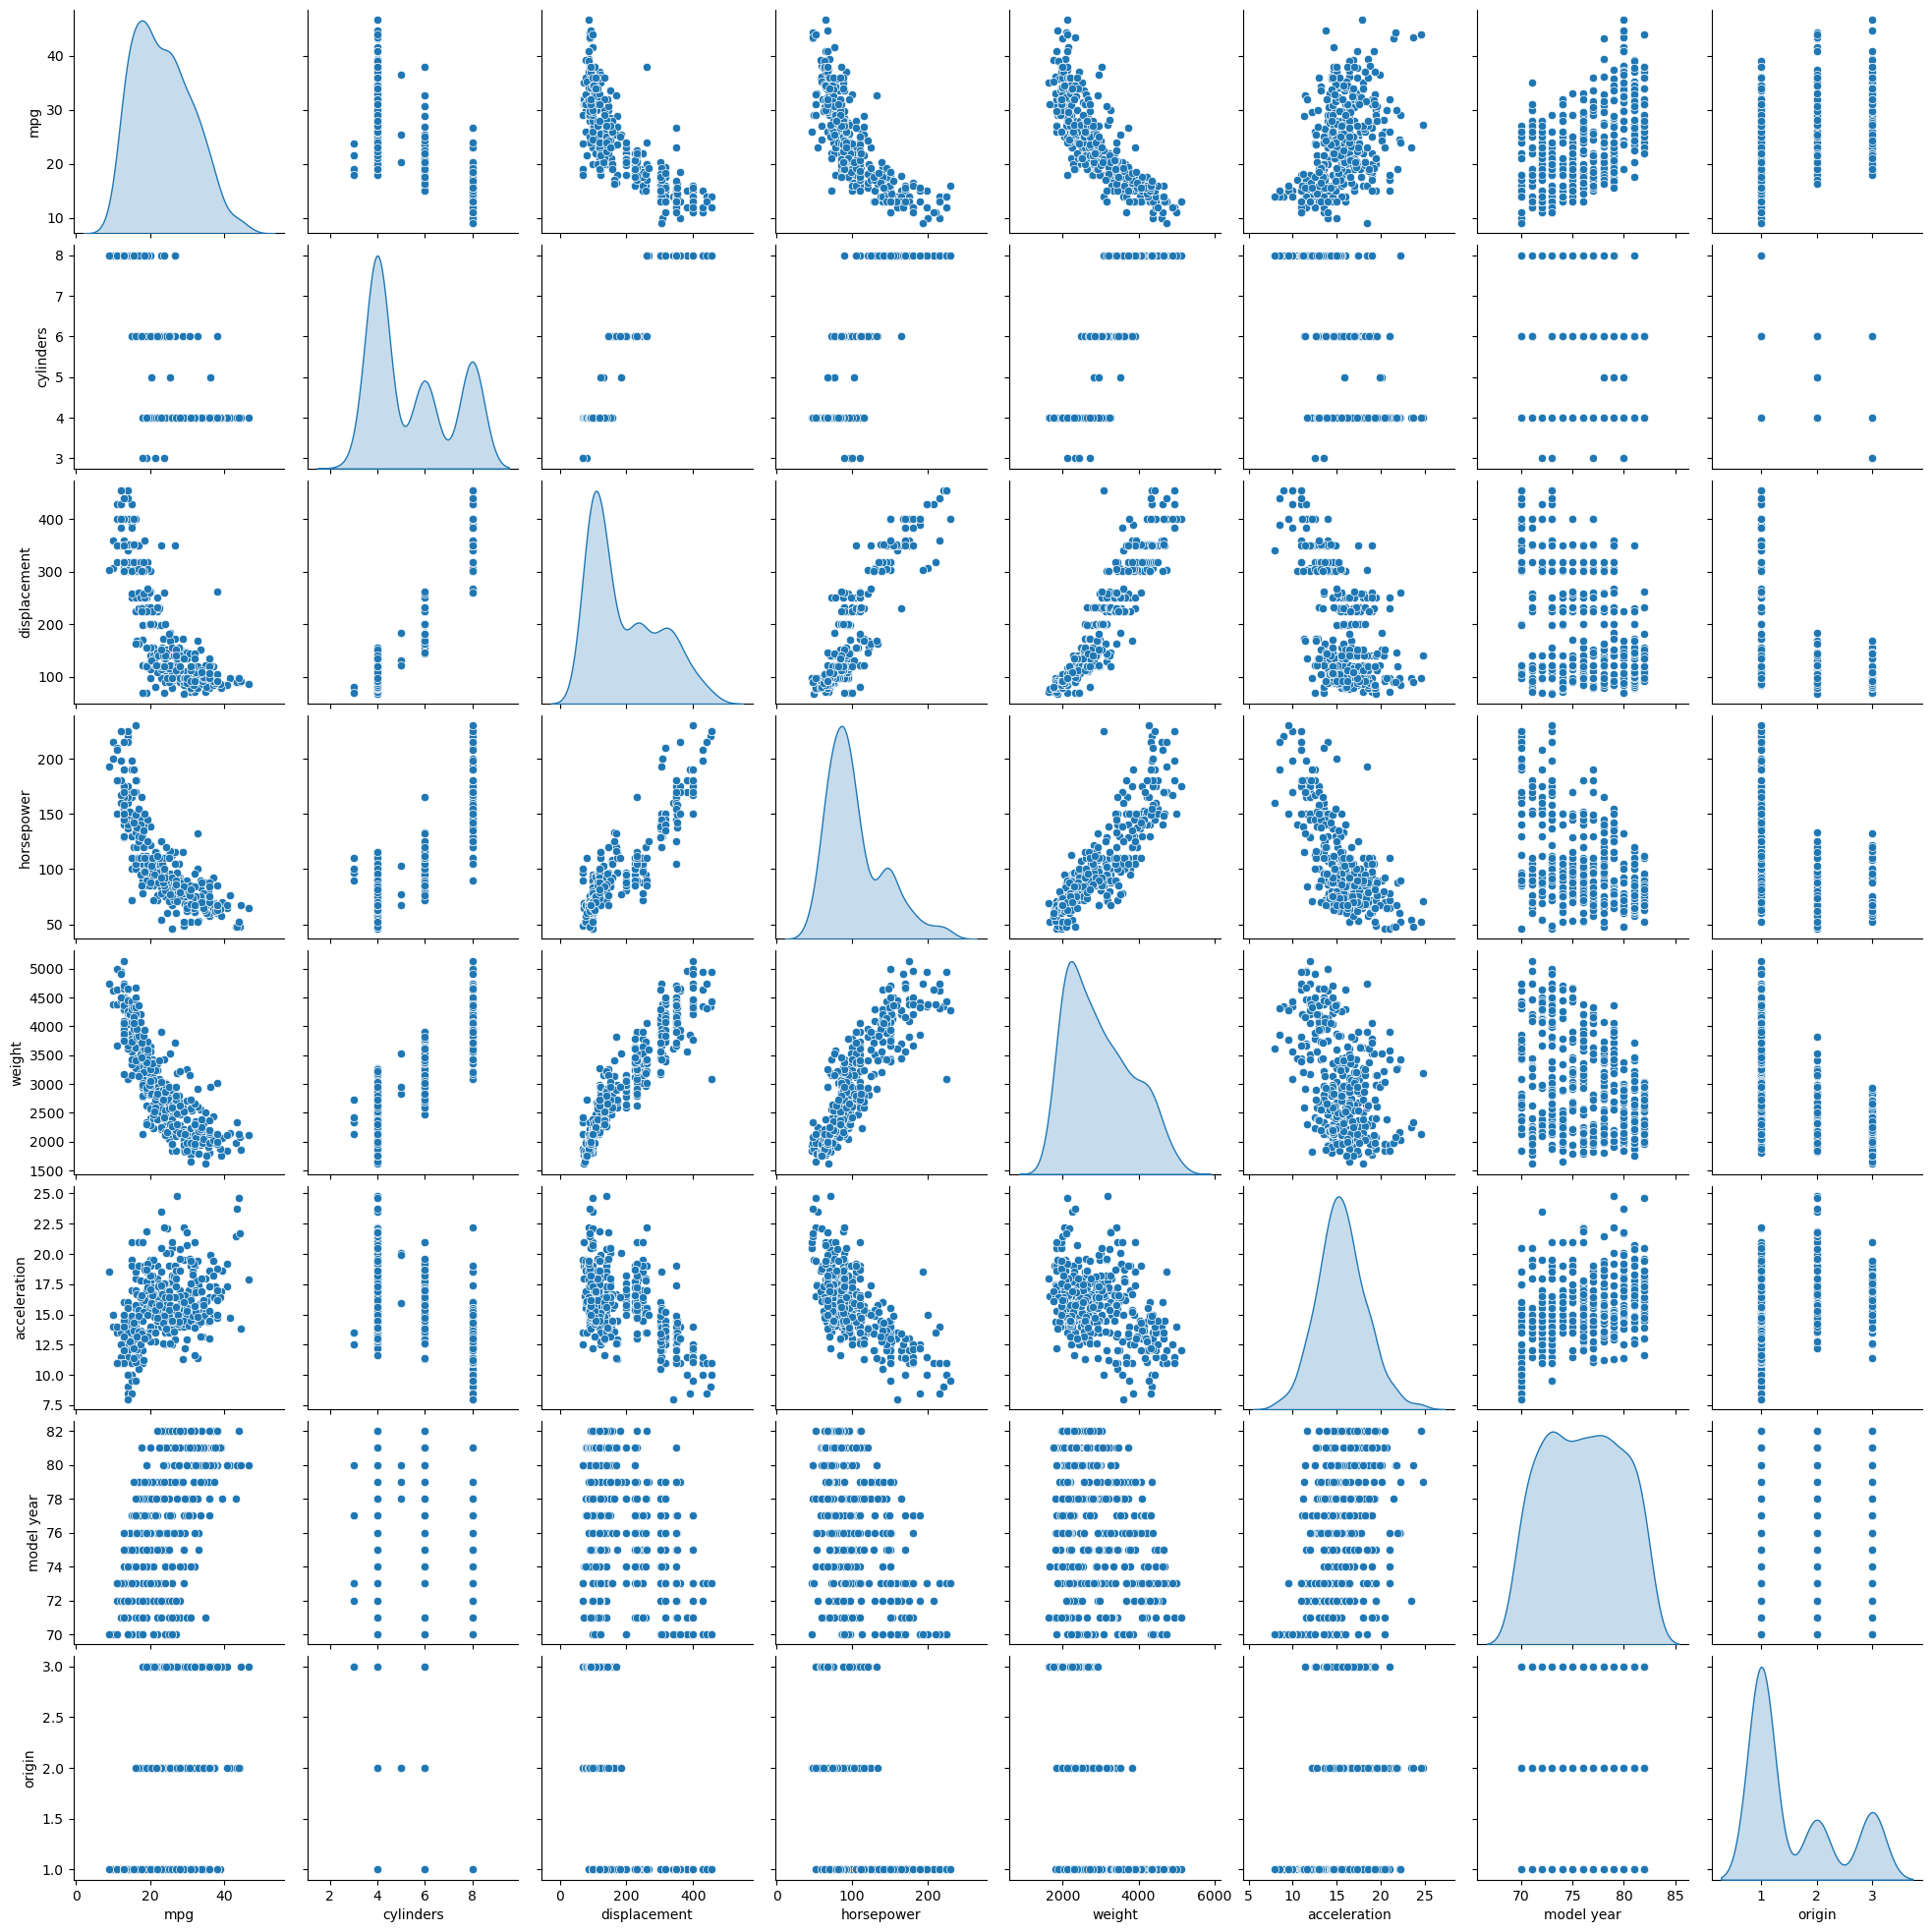

In [23]:
sns.pairplot(dataset,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

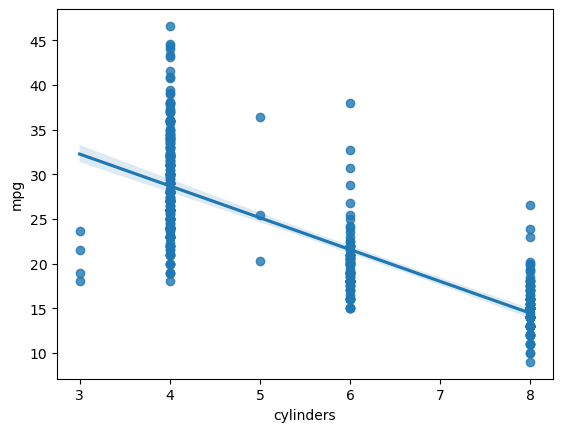

In [24]:
sns.regplot(x="cylinders", y="mpg", data=dataset)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

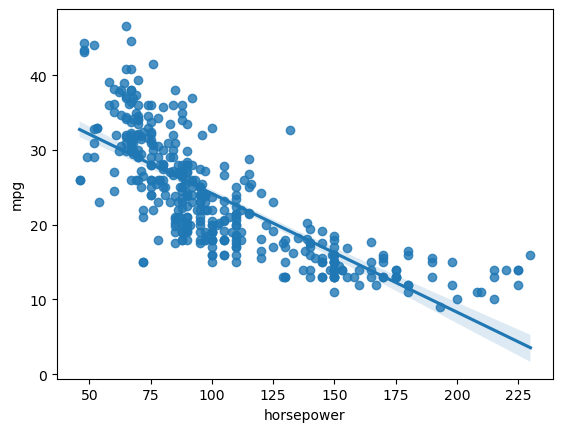

In [27]:
sns.regplot(x="displacement", y="mpg", data=dataset)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

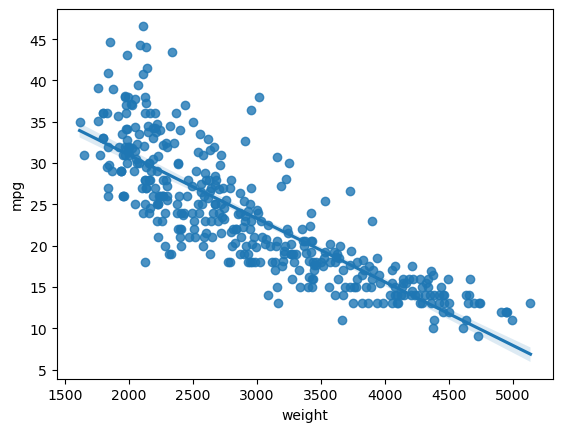

In [28]:
sns.regplot(x="horsepower", y="mpg", data=dataset)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

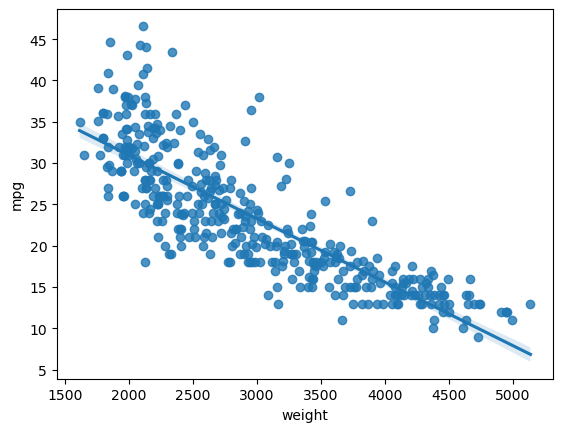

In [29]:
sns.regplot(x="weight", y="mpg", data=dataset)

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

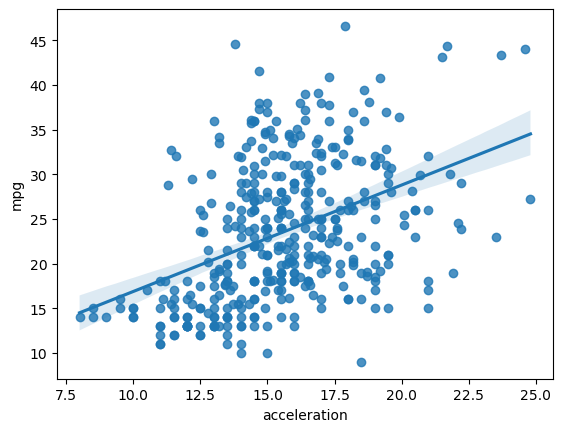

In [30]:
sns.regplot(x="acceleration", y="mpg", data=dataset)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

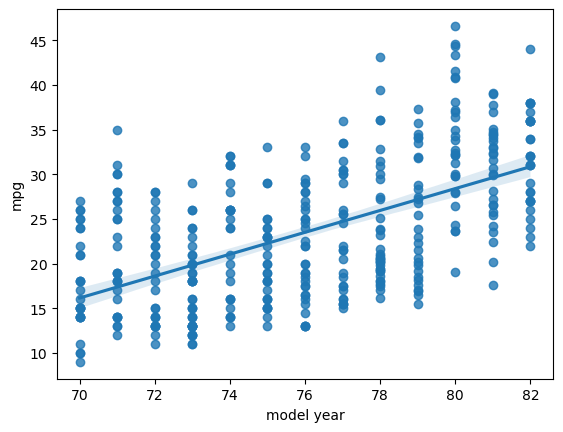

In [31]:
sns.regplot(x="model year", y="mpg", data=dataset)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

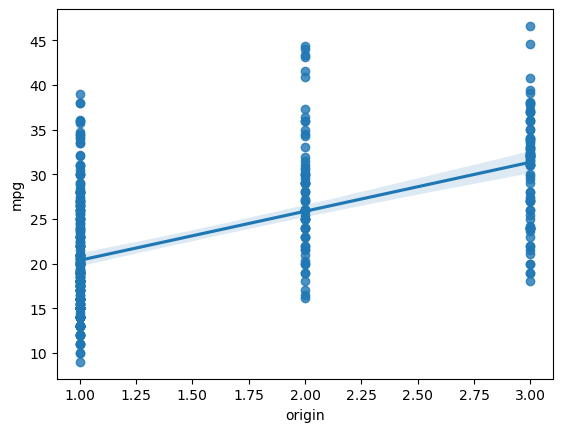

In [32]:
sns.regplot(x="origin", y="mpg", data=dataset)

<AxesSubplot:xlabel='mpg'>

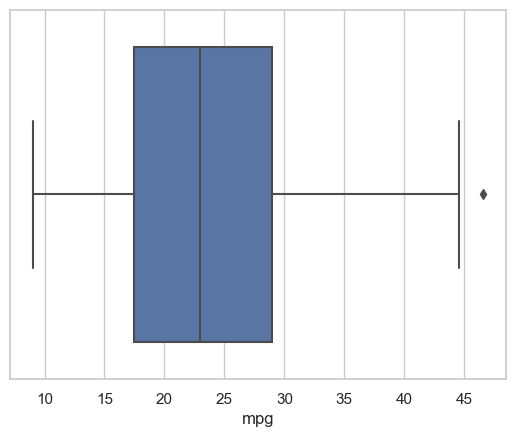

In [33]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["mpg"])

In [38]:
from scipy import stats

In [35]:
pearson_coef, p_value = stats.pearsonr(dataset['cylinders'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7753962854205543  with a P-value of P = 4.503992246176927e-81


In [36]:
pearson_coef, p_value = stats.pearsonr(dataset['displacement'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.804202824805898  with a P-value of P = 1.655888910192639e-91


In [37]:

pearson_coef, p_value = stats.pearsonr(dataset['horsepower'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7775013636276671  with a P-value of P = 8.802190914914203e-82


In [40]:
pearson_coef, p_value = stats.pearsonr(dataset['weight'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.831740933244335  with a P-value of P = 2.9727995640500577e-103


In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
dataset=pd.read_csv('https://raw.githubusercontent.com/DaRk-plays/blahblah/main/car%20performance.csv')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [44]:
test=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',dataset).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     167.6
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          8.18e-105
Time:                        18:01:24   Log-Likelihood:                -1129.2
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     391   BIC:                             2300.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.4941      2.690     16.171      0.000      38.206      48.782
cylinders       -0.5537      0.402     -1.377      0.169      -1.344       0.237
displacement     0.0125      0.009      1.335      0.183      -0.006       0.031
horsepower      -0.0628      0.017     -3.797      0.000      -0.095      -0.030
weight          -0.0049      0.001     -6.168      0.000      -0.006      -0.003
acceleration    -0.0402      0.121     -0.332      0.740      -0.278       0.198
origin           1.4880      0.345      4.315      0.000       0.810       2.166
==============================================================================
Omnibus:                       31.632   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.557
Skew:                           0.613   Prob(JB):                     9.46e-10
Kurtosis:                       4.002   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
x=dataset[['cylinders','displacement','horsepower','weight','model year','origin']].values
x

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 7.000e+01, 1.000e+00],
       ...,
       [4.000e+00, 1.350e+02, 8.400e+01, 2.295e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.200e+02, 7.900e+01, 2.625e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.190e+02, 8.200e+01, 2.720e+03, 8.200e+01, 1.000e+00]])

In [46]:
y=dataset.iloc[:,0:1].values
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)
y_train = sd.fit_transform(y_train)
y_test = sd.fit_transform(y_test)

x_train


array([[ 1.46858608,  2.48230464,  2.97979869,  1.62455076, -1.61295698,
        -0.71873488],
       [ 1.46858608,  1.48729292,  1.55782064,  0.84358808, -1.61295698,
        -0.71873488],
       [-0.86550411, -0.70364636, -0.63978179, -0.36507278,  0.82235108,
        -0.71873488],
       ...,
       [-0.86550411, -1.21071964, -1.44126033, -1.31380657, -0.80118763,
         0.53032865],
       [ 0.30154098,  0.53055088, -0.12269887,  0.35799706, -1.3423672 ,
        -0.71873488],
       [-0.86550411, -1.00023639, -0.87246911, -0.89319732, -0.26000806,
         0.53032865]])

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0,criterion="mae")
dt.fit(x_train,y_train)

C:\Users\mohammed sahil\anaconda5\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae', random_state=0)

In [51]:
import pickle
pickle.dump(dt,open('decision_model.pkl','wb'))
y_pred=dt.predict(x_test)
y_pred

array([-1.21248604, -0.17830889, -1.21248604, -0.43685318, -0.82466961,
        0.98514039,  2.07102639, -0.17830889, -1.08321389,  0.20950753,
        2.74324153,  2.74324153, -0.43685318,  0.33877968, -0.95394175,
        1.6315011 ,  0.46805182,  0.31292525, -0.82466961,  1.24368468,
       -0.95394175, -0.04903675, -0.24294497, -0.56612532,  1.39881125,
        0.20950753,  0.79123218,  0.98514039,  0.98514039, -0.43685318,
       -0.88930568,  1.11441253, -1.08321389,  1.04977646, -0.54027089,
        0.05438096, -1.08321389, -0.95394175,  0.79123218, -1.60030246])

In [52]:
y_test

array([[-1.29002284],
       [ 0.03307751],
       [-1.41030469],
       [-0.44804989],
       [-0.80889544],
       [ 1.23589601],
       [ 1.12764234],
       [-0.56833174],
       [-1.16974099],
       [-0.14734527],
       [ 1.94555892],
       [ 1.50051608],
       [-0.80889544],
       [-0.20748619],
       [-1.10960007],
       [ 1.3200933 ],
       [ 0.75476861],
       [ 0.27364121],
       [-0.80889544],
       [ 1.51254426],
       [-1.10960007],
       [-0.20748619],
       [-0.08720434],
       [-0.80889544],
       [ 1.17575508],
       [ 0.08119025],
       [ 1.36820604],
       [ 1.11561416],
       [ 0.63448676],
       [-1.04945914],
       [-0.73672633],
       [ 1.47645971],
       [-1.16974099],
       [ 1.05547323],
       [-0.2796553 ],
       [-0.08720434],
       [-0.68861359],
       [-0.94120548],
       [ 0.86302227],
       [-1.53058654]])

C:\Users\mohammed sahil\anaconda5\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohammed sahil\anaconda5\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


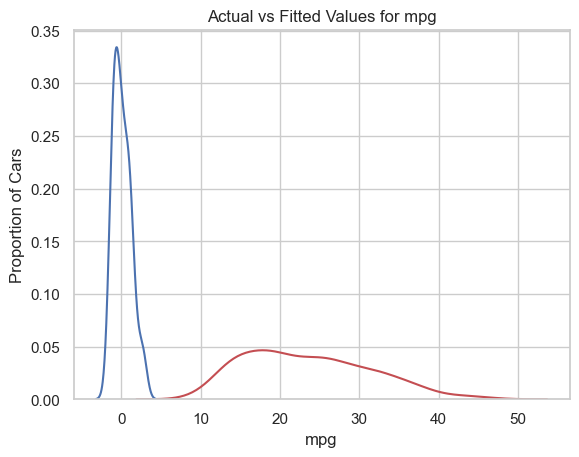

In [53]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')
 
plt.show()
plt.close()

In [54]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.8578094522360582

In [55]:
mean_squared_error(y_test,y_pred)

0.14219054776394183

In [56]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.377081619498938

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=10,random_state=0,criterion='mae')
rf.fit(x_train,y_train)

C:\Users\mohammed sahil\AppData\Local\Temp\ipykernel_28544\2150619191.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\mohammed sahil\anaconda5\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mae', n_estimators=10, random_state=0)

In [58]:
y_pred2=rf.predict(x_test)
y_pred2

array([-1.19955882,  0.02206293, -1.26419489, -0.20416332, -0.76132626,
        0.95928596,  1.38329859,  0.00267211, -1.13492275,  0.31033981,
        1.81894571,  1.78274951, -0.47563482,  0.08023539, -0.94747814,
        1.12992519,  0.59861668,  0.43185562, -0.82984049,  1.26049005,
       -0.98625979,  0.26897272,  0.15779868, -0.42909685,  0.95023691,
        0.21855658,  1.41690935,  1.06141095,  1.05106918, -0.89447656,
       -0.42521869,  0.61671478, -0.81303511,  0.94635875, -0.16925984,
       -0.04645131, -0.59197975, -0.92162371,  1.1428524 , -1.53566639])

C:\Users\mohammed sahil\anaconda5\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohammed sahil\anaconda5\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


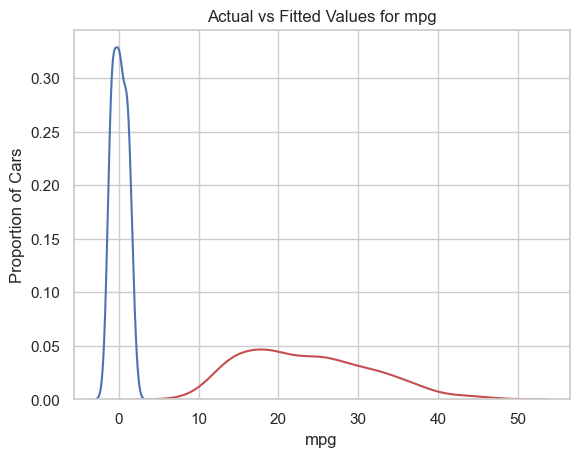

In [59]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred2)

0.924207243254574

In [61]:
mean_squared_error(y_test,y_pred2)

0.07579275674542593

In [62]:
np.sqrt(mean_squared_error(y_test,y_pred2))

0.27530484330179505

In [63]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)
LinearRegression()
y_pred3=mr.predict(x_test)
y_pred3

array([[-1.48379596],
       [ 0.01530662],
       [-1.69023104],
       [-0.42933379],
       [-0.86055589],
       [ 0.68273575],
       [ 1.21460687],
       [-0.13755481],
       [-1.23575694],
       [ 0.31327991],
       [ 1.21112857],
       [ 1.27490363],
       [-0.35870044],
       [ 0.22083642],
       [-1.07545007],
       [ 0.83637193],
       [ 0.54272787],
       [ 0.584162  ],
       [-0.87223915],
       [ 0.8945015 ],
       [-1.19464044],
       [ 0.05731174],
       [ 0.33938181],
       [-0.50420267],
       [ 0.71830854],
       [ 0.52618299],
       [ 0.89492541],
       [ 0.74904333],
       [ 0.74470498],
       [-0.81750679],
       [-0.52212947],
       [ 0.92135277],
       [-0.41703247],
       [ 1.02334916],
       [-0.06200829],
       [ 0.26356843],
       [-0.37693174],
       [-1.01362347],
       [ 1.03949081],
       [-2.01648756]])

C:\Users\mohammed sahil\anaconda5\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohammed sahil\anaconda5\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


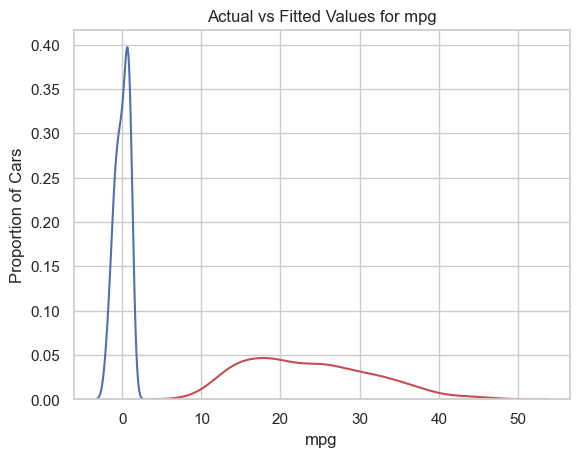

In [64]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [65]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred3)

0.8695139430807295

In [66]:
mean_squared_error(y_test,y_pred3)

0.1304860569192705

In [67]:
np.sqrt(mean_squared_error(y_test,y_pred3))

0.36122853835109775